# Unity ML-Agents Toolkit Gym Wrapper
## Environment Basics
This notebook contains a walkthrough of the basic functions of the Python Gym Wrapper for the Unity ML-Agents toolkit. For instructions on building a Unity environment, see [here](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Getting-Started-with-Balance-Ball.md).

### 1. Set environment parameters

Be sure to set `env_name` to the name of the Unity environment file you want to launch. Ensure that the environment build is in the `python/` directory.

In [7]:
env_name = "../envs/GridWorld"  # Name of the Unity environment binary to launch
train_mode = True  # Whether to run the environment in training or inference mode

### 2. Load dependencies

The following loads the necessary dependencies and checks the Python version (at runtime). ML-Agents Toolkit (v0.3 onwards) requires Python 3.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from gym_unity.envs import UnityEnv

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents Toolkit (v0.3 onwards) requires Python 3")

Python version:
3.6.2 (v3.6.2:5fd33b5926, Jul 16 2017, 20:11:06) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


### 3. Start the environment
`UnityGymEnv` launches and begins communication with the environment when instantiated.

In [8]:
env = UnityEnv(env_name)

# Examine environment parameters
print(str(env))

INFO:unityagents:
'GridAcademy' started successfully!
Unity Academy name: GridAcademy
        Number of Brains: 1
        Number of External Brains : 1
        Reset Parameters :
		gridSize -> 5.0
		numGoals -> 1.0
		numObstacles -> 1.0
Unity brain name: GridWorldBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


<UnityEnv instance>


### 4. Examine the observation and state spaces
We can reset the environment to be provided with an initial observation of the environment.

Agent observations look like:


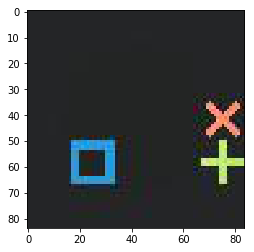

In [9]:
# Reset the environment
initial_observation = env.reset()

if len(env.observation_space.shape) == 1:
    # Examine the initial vector observation
    print("Agent state looks like: \n{}".format(initial_observation))
else:
    # Examine the initial visual observation
    print("Agent observations look like:")
    if env.observation_space.shape[2] == 3:
        plt.imshow(initial_observation[:,:,:])
    else:
        plt.imshow(initial_observation[:,:,0])

### 5. Take random actions in the environment
Once we restart an environment, we can step the environment forward and provide actions to all of the agents within the environment. Here we simply choose random actions using the `env.action_space.sample()` function.

Once this cell is executed, 10 messages will be printed that detail how much reward will be accumulated for the next 10 episodes. The Unity environment will then pause, waiting for further signals telling it what to do next. Thus, not seeing any animation is expected when running this cell.

In [10]:
for episode in range(10):
    initial_observation = env.reset()
    done = False
    episode_rewards = 0
    while not done:
        observation, reward, done, info = env.step(env.action_space.sample())
        episode_rewards += reward
    print("Total reward this episode: {}".format(episode_rewards))

Total reward this episode: -1.1799999959766865
Total reward this episode: -1.0
Total reward this episode: -1.669999985024333
Total reward this episode: 0.5100000109523535
Total reward this episode: -1.119999997317791
Total reward this episode: -1.739999983459711
Total reward this episode: 0.8600000031292439
Total reward this episode: 0.450000012293458
Total reward this episode: 0.880000002682209
Total reward this episode: -1.1399999968707561


### 6. Close the environment when finished
When we are finished using an environment, we can close it with the function below.

In [11]:
env.close()